# Heart Dataset

# 1. Data Description

The dataset contains many medical indicators , the goal is to do exploratory data analysis on the status of heart disease. The dataset contains medical history of patients of Hungarian and Switzerland origin.
Its a classification problem.	

***
**Data Dictionary**

Dataset ( Rows : 270 , Columns : 14 ) 

1. Age: Age is in years         ( Datatype : Float , Min : 29 , Max : 77 , Median : 55 ,Mean : 54)
<br>

2. Gender: <br>
       1 represents  Male ( Datatype : Float , Count : 183 )
       0 represents Female( Datatype : Float , Count : 87 )
<br>

3. Cp: Chest Pain Type ( Datatype : Float )
       1. Value 1: Typical angina ( Chest pain caused when heart muscle doesn't get enough oxygen-rich blood )( Count : 20)
       2. Value 2: Atypical angina ( Women have more of a subtle presentation called atypical angina ) ( Count : 42 )
       3. Value 3: Non-anginal pain ( Count : 79 )
       4. Value 4: Asymptomatic pain ( Neither causing nor exhibiting symptoms of disease ) ( Count : 129 )
<br>

4. Trestbps: Resting blood pressure (in mm Hg on admission to the hospital)<br>
         Normal Conditions : 120 - 140 mm
         Datatype : Float , Min : 94 , Max : 200 , Median : 130 ,Mean : 131
<br>

5. Chol: Serum cholesterol in mg/dl<br>
         Normal Conditions : 100 to 129 mg/dL 
         Datatype : Float , Min : 126 , Max : 564 , Median : 245 ,Mean : 240
<br>

6. Fbs: Fasting blood sugar > 120 mg/dl 
          Normal Conditions : Less than 100 mg/dL
          1 = true ( Datatype : Float , Count : 40 )
          0 = false ( Datatype : Float , Count : 230 )
                 
<br>

7. Thalach: Maximum heart rate achieved in beats per minute (bpm)
           Normal Conditions : 60 to 100 beats per minute
           Datatype : Float , Min : 71 , Max : 202 , Median : 154 ,Mean : 150
<br>

8. Exang: Exercise induced angina 
            1 = Yes ( Datatype : Float , Count : 181 )
            0 = No  ( Datatype : Float , Count : 89 )
<br>

9. Restecg: Resting electrocardiographic results
       1. Value 0: Normal ( Count : 131 )
       2. Value 1: Having ST-T wave abnormality (T wave inversions and ST elevation or depression of > 0.05 mV)(Count : 2)
       3. Value 2: Showing probable or definite left ventricular hypertropy by Estes criteria ( Count : 137 )
<br>

10. Oldpeak: ST depression induced by exercise relative to rest mm ( Datatype : Float , Min : 0 , Max : 6.2 ,Mean : 1.05 , Median : 0.80 )
<br>

11. Slope: Slope of the peak exercise ST segment
        1. Value 1: Upsloping ( Count : 181 )
        2. Value 2: Flat ( Count : 181 )
        3. Value 3: Down-sloping ( Count : 181 )

<br>
12. Ca: Number of major vessels (0-3) colored by fluoroscopy
            
        1. Value 0:  Count : 160 
        2. Value 1:  Count : 58 
        3. Value 2:  Count : 33 
        4. Value 3:  Count : 19 
            
<br>

13. Thal: Thalassemia ( Less Haemoglobin )
         1. Value 3 = Normal ( Count : 152 )
         2. Value 6 = Fixed defect ( Count : 14 )
         3. Value 7 = Reversible defect ( Count : 104 )
         
<br>

14. Goal: Dependent variable
        1. Value 1 = Absence of heart disease (Count : 120)
        2. Value 2 = Presence of heart disease (Count : 150)

***

# 2. Data Loading

In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import cross_val_score ,StratifiedKFold
from scipy import stats
import warnings
import statsmodels.api as sm
import pylab
import eli5 #for permutation importance
from eli5.sklearn import PermutationImportance
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
#reading dataset
dataset=pd.read_csv("C:\\Users\\u22v03\Documents\\Python Scripts\\heart\\heart.txt",header=None,sep=' ')
dataset.columns=['Age', 'Gender', 'CP', 'Trestbps', 'Chol', 'FBS', 'RestECG',
                 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'CA', 'Thal', 'Goal']
nRow, nCol = dataset.shape

n_with_disease = dataset[dataset["Goal"]==2].shape[0]
n_without_disease = dataset[dataset["Goal"]==1].shape[0]
greater_percent = (n_with_disease*100)/float(nRow)

print(f'**Summary**:\n There are {nRow} rows and {nCol} columns. Goal is the target/label variable that can have only value(1/2)')
disease = len(dataset[dataset['Goal'] == 2])
non_disease = len(dataset[dataset['Goal'] == 1])
plt.pie(x=[disease, non_disease], explode=(0, 0), labels=['Diseased ', 'Non-diseased'], autopct='%1.2f%%', shadow=True, startangle=90)
plt.savefig("output.png")
plt.show()
non_disease

In [ ]:
output1=0
output2=1
output3=0
d={0:'Absence',1:'Presence'}
mylist = [d[k] for k in [output1,output2,output3]]
mylist[0]

In [ ]:
#Check sample of any 5 rows
dataset=dataset.reset_index()
dataset=dataset.drop(['index'],axis=1)
dataset.sample(5)

# 3. Data Pre-processing

In [ ]:
# Get the number of missing data points, NA's ,NAN's values per column
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

total = dataset.isna().sum().sort_values(ascending=False)
percent = (dataset.isna().sum()/dataset.isna().count()).sort_values(ascending=False)
na_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

if((na_data.all()).all()>0 or (na_data.all()).all()>0):
     print('Found Missing Data or NA values')
#print(na_data,"\n",missing_data)

Conclusion:<br>
    There is no missing data or null values in the collected data. Additionally, the length of each column is same.

In [ ]:
#Detect outliers
plt.subplots(figsize=(18,10))
dataset.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)


From the above box plot, there are some outliers in Chol and Trestbps attributes. I will remove the outliers which will be out of the 3 standard deviation by using z-score.
#### Z Score
Z-score is the number of standard deviations from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is. 

In [ ]:
df=dataset[~(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]
df.dtype

Almost all of the data (99.7%) should be within three standard deviations from the mean.Removing the observations that are out of 3 standard deviations.

In [10]:
dataset=dataset.drop(dataset[~(np.abs(stats.zscore(dataset)) < 3).all(axis=1)].index)

### Converting Categorical data 

In [11]:
dataset['Gender']=dataset['Gender'].replace([1,0], ['Male', 'Female'])
dataset['Goal']=dataset['Goal'].replace([1,2], ['Absence', 'Presence'])
dataset['Slope']=dataset['Slope'].replace([1,2,3], ['Upsloping','Flat','Down-sloping'])
dataset['RestECG']=dataset['RestECG'].replace([0,1,2], ['Normal', 'Abnormality','Hypertrophy'])
dataset['Exang']=dataset['Exang'].replace([1,0], ['Yes', 'No'])
dataset['FBS']=dataset['FBS'].replace([1,0], ['Yes', 'No'])
dataset['Thal']=dataset['Thal'].replace([3,6,7], ['Normal', 'Fixed Defect','Reversible defect'])
dataset['CP']=dataset['CP'].replace([1,2,3,4], ['Typical angina', 'Atypical angina','Non-anginal pain','Asymptomatic pain'])

dataset['Gender']=dataset['Gender'].astype('object')
dataset['CP']=dataset['CP'].astype('object')
dataset['Thal']=dataset['Thal'].astype('object')
dataset['FBS']=dataset['FBS'].astype('object')
dataset['Exang']=dataset['Exang'].astype('object')
dataset['RestECG']=dataset['RestECG'].astype('object')
dataset['Slope']=dataset['Slope'].astype('object')

# 4.  Visualisation
### Attribute relationships

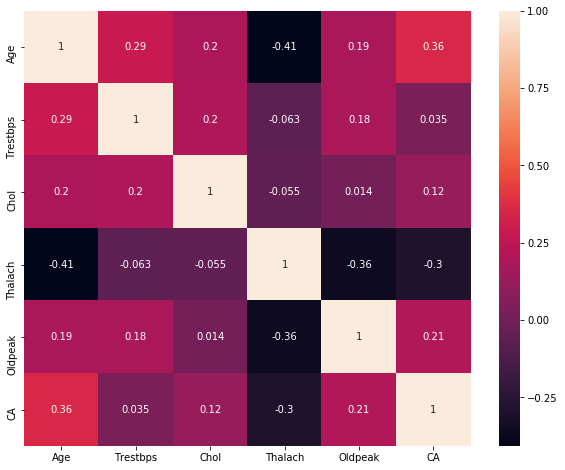

In [12]:
cont_dataset=dataset.copy()
cont_dataset=cont_dataset.drop(['Gender','Slope','Thal','CP','FBS','RestECG','Exang','Goal'],axis=1)
plt.subplots(figsize=(10,8))
colr=sns.heatmap(cont_dataset.corr(),robust=True,annot=True)
figure = colr.get_figure()    
figure.savefig('correlation.png', dpi=400)

Conclusion:<br>
####  Positive correlation: Age vs Trestbps, Age vs Oldpeak, Cholestrol vs Trestbps
* The graph shows  positive correlation between age and trestbps. As the age of a person increases, the value of blood pressure(Trestbps) also increases. 
* The graph shows  positive correlation between age and oldpeak. As the age of a person increases, the value of oldpeak increases. 
* Cholestrol and blood pressure are showing  positive correlation which makes sense as High cholesterol is associated with an elevated risk of cardiovascular disease.

####  Negative Correlation : Age vs Thalach , Thalach vs Oldpeak
* The graph shows  negative correlation between age and Thalach which makes sense as the age of a person increases, the value of heart rate decreases.
* The graph shows  negative correlation between Oldpeak and Thalach which makes sense as the heart rate of a person increases, the value of oldpeak decreases.

##  4.1. Continous Variables
## 4.1.1 Age

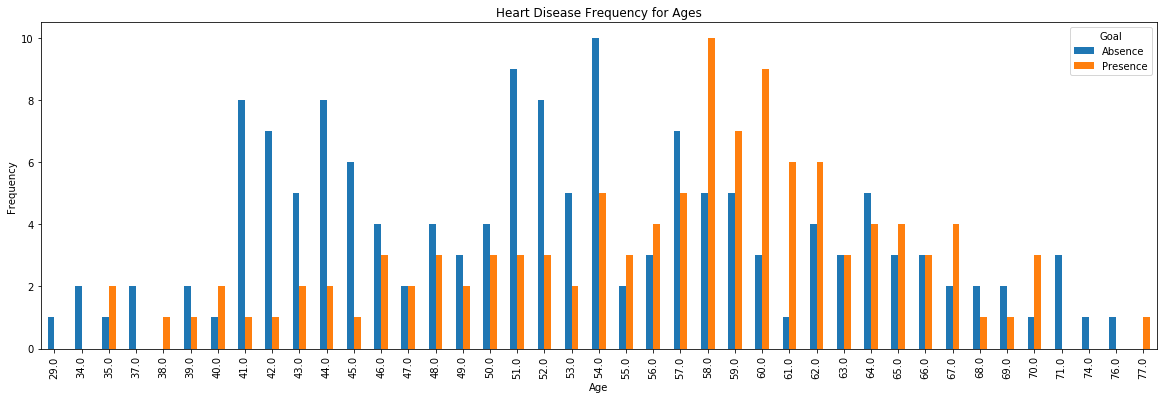

In [13]:
pd.crosstab(dataset['Age'],dataset['Goal']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
# plt.savefig('heartDiseaseAndAges.png')
plt.show()

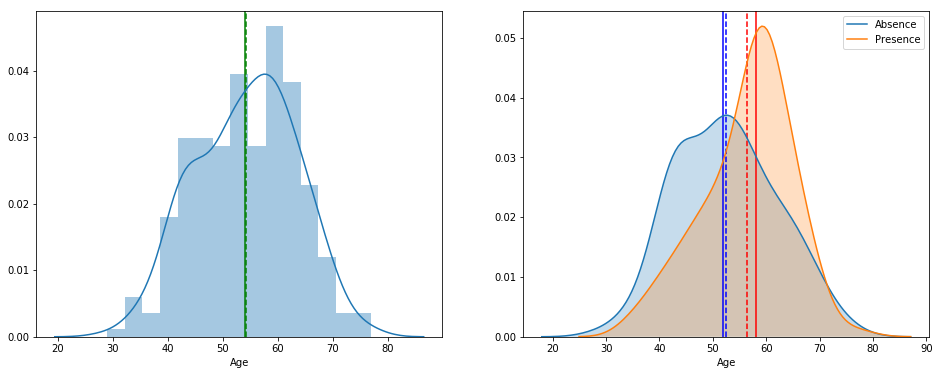

 	Mean & Median of whole dataset are 54.22 & 54.0			Mean & Median of absence data = 52.53 & 52.0
									Mean & Median of presence data are 56.44 & 58.0  


In [14]:
absence = dataset[dataset['Goal']=='Absence']['Age']
presence = dataset[dataset['Goal']=='Presence']['Age']

fig, ax = plt.subplots(1,2,figsize=(16,6))
mean=round(dataset['Age'].mean(),2)
median=dataset['Age'].median()
a_median=absence.median()
a_mean=round(absence.mean(),2)
p_median=presence.median()
p_mean=round(presence.mean(),2)

ax[1].axvline(p_median, color='r', linestyle='-')
ax[1].axvline(p_mean, color='r', linestyle='--')
ax[1].axvline(a_median, color='b', linestyle='-')
ax[1].axvline(a_mean, color='b', linestyle='--')
ax[0].axvline(median, color='g', linestyle='-')
ax[0].axvline(mean, color='g', linestyle='--')

ax[0]=sns.distplot(dataset['Age'],bins=15,ax=ax[0])
ax[1]=sns.kdeplot(absence, label='Absence', shade=True)
ax[1]=sns.kdeplot(presence, label='Presence',shade=True)

plt.xlabel('Age');
plt.show()
fig.savefig('age_old.png')
print(f' \tMean & Median of whole dataset are {mean} & {median}\t\t\tMean & Median of absence data = {a_mean} & {a_median}\n\t\t\t\t\t\t\t\t\tMean & Median of presence data are {p_mean} & {p_median}  ')

In [15]:
print(f"Normal Test for the Age distribution {stats.normaltest(dataset['Age'])}") #Null hypothesis : data came from a normal distribution.

print(f"Skewness for the whole dataset {pd.DataFrame.skew(dataset['Age'], axis=0)}") #left skewed
print(f"Skewness of non-disease cohort {pd.DataFrame.skew(absence, axis=0)}")  #right skewed
print(f"Skewness of disease cohort{pd.DataFrame.skew(presence, axis=0)}")   #left skewed

#If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

Normal Test for the Age distribution NormaltestResult(statistic=6.747044110448095, pvalue=0.03426872819095869)
Skewness for the whole dataset -0.1290342073299296
Skewness of non-disease cohort 0.18050903343953356
Skewness of disease cohort-0.5200097110889433


Comments:
From the above graphs and the skewness value and normal test, its clear that the distribution is not normal.

The median age for patients was 55 with the youngest and oldest being 29 and 77, respectively. Patients exhibiting presence of disease had a higher median age of 58 compared to the patients with absence of heart disease which had a median of 52. 

As seen in the graphs, the distribution contains two groups in it.To show the difference between the groups(absence and presence), I will perform t-test.
#### Central Limit Theorem
To reduce the variablity around the means of two groups, I will use central limit theorem which states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all sample from the same population will be approximately equal to the mean of the population.


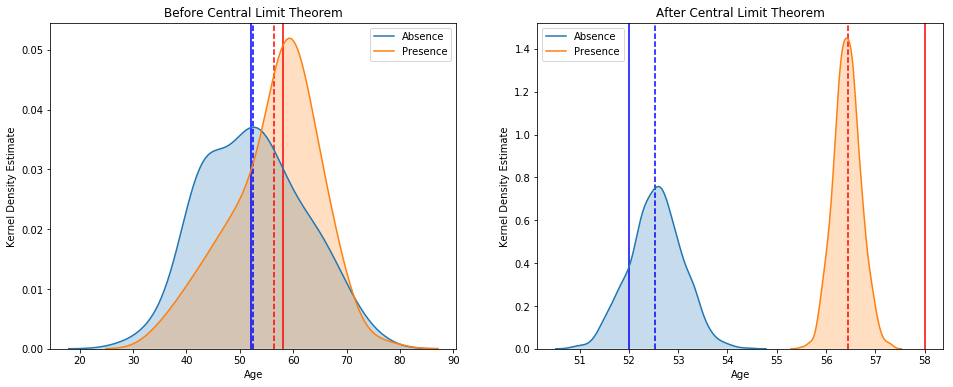

 	Mean & Median of whole dataset are 54.22 & 54.0			Mean & Median of absence data = 52.53 & 52.0
									Mean & Median of presence data are 56.44 & 58.0  


In [16]:
absenceMeans = []
presenceMeans = []
sampleMeans=[]
for _ in range(1000):
    samples = dataset['Age'].sample(n=200)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)
    
    samples = absence.sample(n=100)
    sampleMean = np.mean(samples)
    absenceMeans.append(sampleMean)
    
    samples = presence.sample(n=100)
    sampleMean = np.mean(samples)
    presenceMeans.append(sampleMean)


    
fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[1].axvline(p_median, color='r', linestyle='-')
ax[1].axvline(p_mean, color='r', linestyle='--')
ax[1].axvline(a_median, color='b', linestyle='-')
ax[1].axvline(a_mean, color='b', linestyle='--')

ax[0].axvline(p_median, color='r', linestyle='-')
ax[0].axvline(p_mean, color='r', linestyle='--')
ax[0].axvline(a_median, color='b', linestyle='-')
ax[0].axvline(a_mean, color='b', linestyle='--')

ax[0] =sns.kdeplot(absence, label='Absence', shade=True,ax=ax[0])
ax[0] =sns.kdeplot(presence, label='Presence',shade=True,ax=ax[0])

ax[1] =sns.kdeplot(absenceMeans, label='Absence', shade=True,ax=ax[1])
ax[1] =sns.kdeplot(presenceMeans, label='Presence',shade=True,ax=ax[1])
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Kernel Density Estimate')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Kernel Density Estimate')
ax[0].set_title('Before Central Limit Theorem')
ax[1].set_title('After Central Limit Theorem')
plt.show()
fig.savefig('age.png')
print(f' \tMean & Median of whole dataset are {mean} & {median}\t\t\tMean & Median of absence data = {a_mean} & {a_median}\n\t\t\t\t\t\t\t\t\tMean & Median of presence data are {p_mean} & {p_median}  ')

Comments:
Assumption :- As seen in above graph, the mean of non-disease cohort is less than the mean of diseased cohort.

Null Hypothesis :- there is no difference in Mean of disease cohort and non-disease cohort.

Alternate Hypothesis :- there is difference in Mean of disease cohort and non-disease cohort.

In [241]:
#t-test on independent samples
t2, p2 = stats.ttest_ind(presenceMeans,absenceMeans)
print("t = " + str(t2))
print("p = " + str(2*p2))

t = 204.53902816158978
p = 0.0


### Observation
p-value < 0.05<br>
Reject null hypothesis that there is no difference in Mean of disease cohort and non-disease cohort.<br>
So, I conclude that people who are slightly older have more chance of having heart disease. 
Therefore, age would be a predictive feature.

## 4.1.2 Resting Blood Pressure 


In [242]:
print(f"Normal Test for the whole dataset {stats.normaltest(dataset['Trestbps'])}") #Null hypothesis : data came from a normal distribution.

Normal Test for the whole dataset NormaltestResult(statistic=12.148718536526424, pvalue=0.002301120114565709)


Comment:  <br>   Like the previous case this distribution is also not normal.As seen in the graphs, the distribution contains two groups in it.To show the difference between the groups(absence and presence), I will perform t-test.
    
### Central Limit Theorem
To reduce the variablity around the means of two groups, I will use central limit theorem which states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all sample from the same population will be approximately equal to the mean of the population.

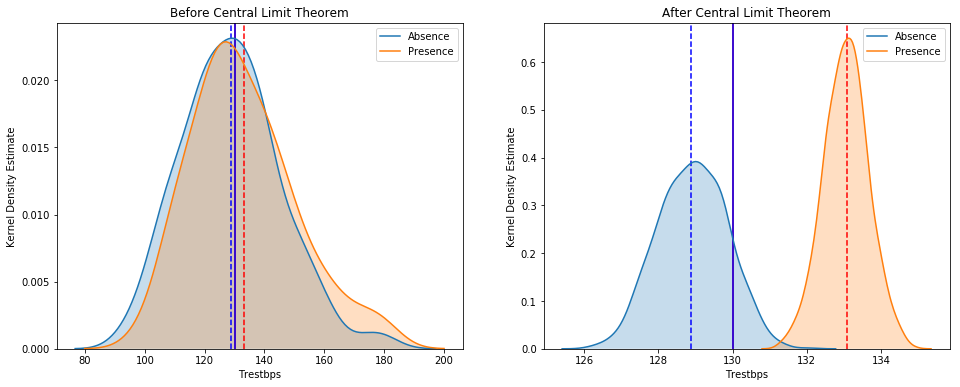

 	Mean & Median of absence data = 128.89 & 130.0			Mean & Median of presence data are 133.07 & 130.0  


In [365]:
absence = dataset[dataset['Goal']=='Absence']['Trestbps']
presence = dataset[dataset['Goal']=='Presence']['Trestbps']

a_median=absence.median()
a_mean=round(absence.mean(),2)
p_median=presence.median()
p_mean=round(presence.mean(),2)
absenceMeans = []
presenceMeans = []
sampleMeans=[]
for _ in range(1000):
    samples = dataset['Trestbps'].sample(n=100)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)
    
    samples = absence.sample(n=100)
    sampleMean = np.mean(samples)
    absenceMeans.append(sampleMean)
    
    samples = presence.sample(n=100)
    sampleMean = np.mean(samples)
    presenceMeans.append(sampleMean)
    
fig, ax = plt.subplots(1,2,figsize=(16,6))

ax[1].axvline(p_median, color='r', linestyle='-')
ax[1].axvline(p_mean, color='r', linestyle='--')
ax[1].axvline(a_median, color='b', linestyle='-')
ax[1].axvline(a_mean, color='b', linestyle='--')

ax[0].axvline(p_median, color='r', linestyle='-')
ax[0].axvline(p_mean, color='r', linestyle='--')
ax[0].axvline(a_median, color='b', linestyle='-')
ax[0].axvline(a_mean, color='b', linestyle='--')

ax[0] =sns.kdeplot(absence, label='Absence', shade=True,ax=ax[0])
ax[0] =sns.kdeplot(presence, label='Presence',shade=True,ax=ax[0])

ax[1] =sns.kdeplot(absenceMeans, label='Absence', shade=True)
ax[1] =sns.kdeplot(presenceMeans, label='Presence',shade=True)
ax[0].set_xlabel('Trestbps')
ax[0].set_ylabel('Kernel Density Estimate')
ax[1].set_xlabel('Trestbps')
ax[1].set_ylabel('Kernel Density Estimate')
ax[0].set_title('Before Central Limit Theorem')
ax[1].set_title('After Central Limit Theorem')
plt.show()
fig.savefig('Trestbps.png')
print(f' \tMean & Median of absence data = {a_mean} & {a_median}\t\t\tMean & Median of presence data are {p_mean} & {p_median}  ')

In [244]:
#t-test on independent samples
t2, p2 = stats.ttest_ind(presenceMeans,absenceMeans)
print("t = " + str(t2))
print("p = " + str(2*p2))

t = 122.48573178423875
p = 0.0


### Observation
p-value < 0.05<br>
Reject null hypothesis that there is no difference in Mean of disease cohort and non-disease cohort.<br>
The aggregated resting blood pressure for the entire dataset exhibited a mean value of 130 and for the diseased and non-diseased groups (i.e. 134 and 129 respectively).So, I conclude that people who have slightly high blood pressure have more chance of having heart disease.<br>Therefore, resting blood pressure is a good predictive feature.

## 4.1.3 Cholestrol 

In [245]:
print(f"Normal Test for the whole dataset {stats.normaltest(dataset['Chol'])}") #Null hypothesis : data came from a normal distribution.

Normal Test for the whole dataset NormaltestResult(statistic=2.10532832999989, pvalue=0.3490066979954109)


Comment: 
Like the previous case this distribution is also not normal.As seen in the graphs, the distribution contains two groups in it.To show the difference between the groups(absence and presence), I will perform t-test.

### Central Limit Theorem
To reduce the variablity around the means of two groups, I will use central limit theorem which states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all sample from the same population will be approximately equal to the mean of the population.

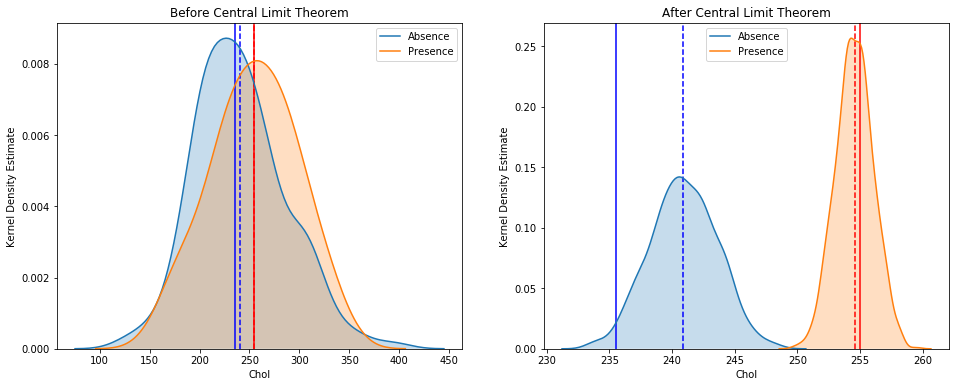

 	Mean & Median of absence data = 240.89 & 235.5			Mean & Median of presence data are 254.61 & 255.0  


In [366]:
absence = dataset[dataset['Goal']=='Absence']['Chol']
presence = dataset[dataset['Goal']=='Presence']['Chol']

a_median=absence.median()
a_mean=round(absence.mean(),2)
p_median=presence.median()
p_mean=round(presence.mean(),2)
absenceMeans = []
presenceMeans = []
sampleMeans=[]
for _ in range(1000):
    samples = dataset['Chol'].sample(n=100)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)
    
    samples = absence.sample(n=100)
    sampleMean = np.mean(samples)
    absenceMeans.append(sampleMean)
    
    samples = presence.sample(n=100)
    sampleMean = np.mean(samples)
    presenceMeans.append(sampleMean)
    
fig, ax = plt.subplots(1,2,figsize=(16,6))

ax[1].axvline(p_median, color='r', linestyle='-')
ax[1].axvline(p_mean, color='r', linestyle='--')
ax[1].axvline(a_median, color='b', linestyle='-')
ax[1].axvline(a_mean, color='b', linestyle='--')

ax[0].axvline(p_median, color='r', linestyle='-')
ax[0].axvline(p_mean, color='r', linestyle='--')
ax[0].axvline(a_median, color='b', linestyle='-')
ax[0].axvline(a_mean, color='b', linestyle='--')

ax[0] =sns.kdeplot(absence, label='Absence', shade=True,ax=ax[0])
ax[0] =sns.kdeplot(presence, label='Presence',shade=True,ax=ax[0])

ax[1] =sns.kdeplot(absenceMeans, label='Absence', shade=True)
ax[1] =sns.kdeplot(presenceMeans, label='Presence',shade=True)
ax[0].set_xlabel('Chol')
ax[0].set_ylabel('Kernel Density Estimate')
ax[1].set_xlabel('Chol')
ax[1].set_ylabel('Kernel Density Estimate')
ax[0].set_title('Before Central Limit Theorem')
ax[1].set_title('After Central Limit Theorem')
plt.show()
fig.savefig('chol.png')
print(f' \tMean & Median of absence data = {a_mean} & {a_median}\t\t\tMean & Median of presence data are {p_mean} & {p_median}  ')

In [247]:
#t-test on independent samples
t2, p2 = stats.ttest_ind(presenceMeans,absenceMeans)
print("t = " + str(t2))
print("p = " + str(2*p2))

t = 146.98555862933068
p = 0.0


### Observation

p-value < 0.05<br>
Reject null hypothesis that there is no difference in Mean of disease cohort and non-disease cohort.<br>Cholestrol levels for the non-disease cohort (median = 236 mg/dL) were lower compared to the diseased patients (median = 255 mg/dL) . Therefore, Cholestrol can be a good predictive feature.

## 4.1.4 Exercise Induced ST Depression

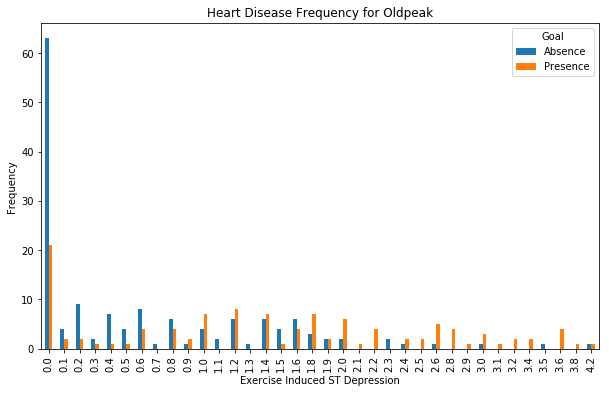

In [248]:
pd.crosstab(dataset['Oldpeak'],dataset['Goal']).plot(kind="bar",figsize=(10,6))
plt.title('Heart Disease Frequency for Oldpeak')
plt.xlabel('Exercise Induced ST Depression')
plt.ylabel('Frequency')
plt.show()

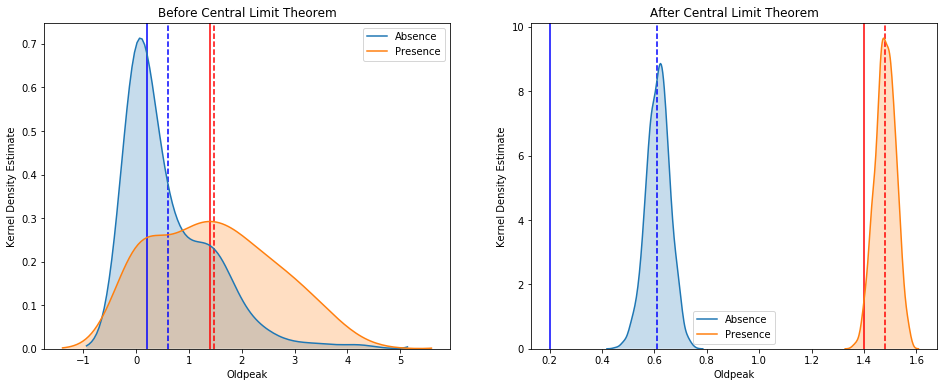

 	Mean & Median of absence data = 0.61 & 0.2			Mean & Median of presence data are 1.48 & 1.4  


In [367]:
absence = dataset[dataset['Goal']=='Absence']['Oldpeak']
presence = dataset[dataset['Goal']=='Presence']['Oldpeak']

a_median=absence.median()
a_mean=round(absence.mean(),2)
p_median=presence.median()
p_mean=round(presence.mean(),2)
absenceMeans = []
presenceMeans = []
sampleMeans=[]
for _ in range(1000):
    samples = dataset['Oldpeak'].sample(n=100)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)
    
    samples = absence.sample(n=100)
    sampleMean = np.mean(samples)
    absenceMeans.append(sampleMean)
    
    samples = presence.sample(n=100)
    sampleMean = np.mean(samples)
    presenceMeans.append(sampleMean)
    
fig, ax = plt.subplots(1,2,figsize=(16,6))

ax[1].axvline(p_median, color='r', linestyle='-')
ax[1].axvline(p_mean, color='r', linestyle='--')
ax[1].axvline(a_median, color='b', linestyle='-')
ax[1].axvline(a_mean, color='b', linestyle='--')

ax[0].axvline(p_median, color='r', linestyle='-')
ax[0].axvline(p_mean, color='r', linestyle='--')
ax[0].axvline(a_median, color='b', linestyle='-')
ax[0].axvline(a_mean, color='b', linestyle='--')

ax[0] =sns.kdeplot(absence, label='Absence', shade=True,ax=ax[0])
ax[0] =sns.kdeplot(presence, label='Presence',shade=True,ax=ax[0])

ax[1] =sns.kdeplot(absenceMeans, label='Absence', shade=True)
ax[1] =sns.kdeplot(presenceMeans, label='Presence',shade=True)
ax[0].set_xlabel('Oldpeak')
ax[0].set_ylabel('Kernel Density Estimate')
ax[1].set_xlabel('Oldpeak')
ax[1].set_ylabel('Kernel Density Estimate')
ax[0].set_title('Before Central Limit Theorem')
ax[1].set_title('After Central Limit Theorem')
plt.show()
fig.savefig('oldpeak.png')
print(f' \tMean & Median of absence data = {a_mean} & {a_median}\t\t\tMean & Median of presence data are {p_mean} & {p_median}  ')

In [250]:
#t-test on independent samples
t2, p2 = stats.ttest_ind(presenceMeans,absenceMeans)
print("t = " + str(t2))
print("p = " + str(2*p2))

t = 458.3893613261764
p = 0.0


### Observation

p-value < 0.05<br>
Reject null hypothesis that there is no difference in Mean of disease cohort and non-disease cohort.<br>The Exercise Induced ST Depression differed between the non-disease and disease cohorts with the majority of cardiac disease patients exhibiting a higher mean and median for disease cohorts .Therefore, ST depression induced by exercise relative to rest can be a good predictive feature.

## 4.1.5 Maximum Heart Rate

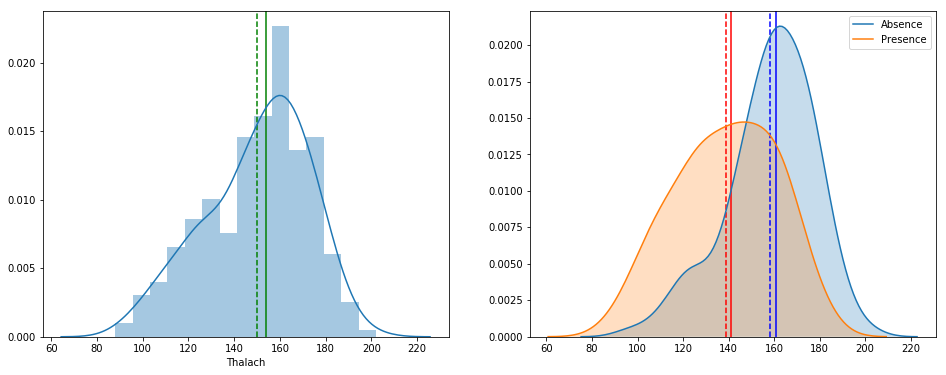

 	Mean & Median of whole dataset are 150.0 & 154.0			Mean & Median of absence data = 158.33 & 161.0
									Mean & Median of presence data are 138.97 & 141.0  


In [349]:
absence = dataset[dataset['Goal']==1]['Thalach']
absence = dataset[dataset['Goal']=='Absence']['Thalach']
presence = dataset[dataset['Goal']=='Presence']['Thalach']
mean=round(dataset['Thalach'].mean())
median=dataset['Thalach'].median()
a_median=absence.median()
a_mean=round(absence.mean(),2)
p_median=presence.median()
p_mean=round(presence.mean(),2)
fig, ax = plt.subplots(1,2,figsize=(16,6))

ax[1].axvline(p_median, color='r', linestyle='-')
ax[1].axvline(p_mean, color='r', linestyle='--')
ax[1].axvline(a_median, color='b', linestyle='-')
ax[1].axvline(a_mean, color='b', linestyle='--')
ax[0].axvline(median, color='g', linestyle='-')
ax[0].axvline(mean, color='g', linestyle='--')

ax[0]=sns.distplot(dataset['Thalach'],bins=15,ax=ax[0])
ax[1] =sns.kdeplot(absence, label='Absence', shade=True)
ax[1] =sns.kdeplot(presence, label='Presence',shade=True)
plt.show()
fig.savefig('thalach_old.png')
print(f' \tMean & Median of whole dataset are {mean} & {median}\t\t\tMean & Median of absence data = {a_mean} & {a_median}\n\t\t\t\t\t\t\t\t\tMean & Median of presence data are {p_mean} & {p_median}  ')
# Oldpeak: ST depression induced by exercise relative to rest

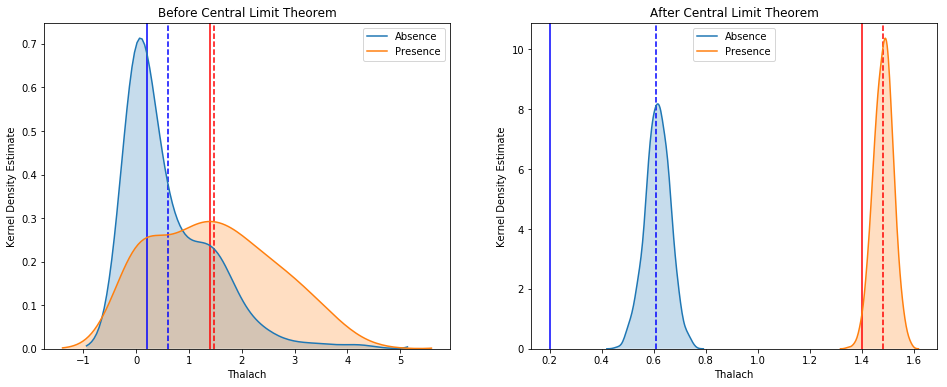

 	Mean & Median of whole dataset are 150.0 & 154.0			Mean & Median of absence data = 0.61 & 0.2
									Mean & Median of presence data are 1.48 & 1.4  


In [368]:
absenceMeans = []
presenceMeans = []
sampleMeans=[]
for _ in range(1000):
    samples = dataset['Thalach'].sample(n=100)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)
    
    samples = absence.sample(n=100)
    sampleMean = np.mean(samples)
    absenceMeans.append(sampleMean)
    
    samples = presence.sample(n=100)
    sampleMean = np.mean(samples)
    presenceMeans.append(sampleMean)
    
    
fig, ax = plt.subplots(1,2,figsize=(16,6))

ax[1].axvline(p_median, color='r', linestyle='-')
ax[1].axvline(p_mean, color='r', linestyle='--')
ax[1].axvline(a_median, color='b', linestyle='-')
ax[1].axvline(a_mean, color='b', linestyle='--')

ax[0].axvline(p_median, color='r', linestyle='-')
ax[0].axvline(p_mean, color='r', linestyle='--')
ax[0].axvline(a_median, color='b', linestyle='-')
ax[0].axvline(a_mean, color='b', linestyle='--')

ax[0] =sns.kdeplot(absence, label='Absence', shade=True,ax=ax[0])
ax[0] =sns.kdeplot(presence, label='Presence',shade=True,ax=ax[0])

ax[1] =sns.kdeplot(absenceMeans, label='Absence', shade=True)
ax[1] =sns.kdeplot(presenceMeans, label='Presence',shade=True)
ax[0].set_xlabel('Thalach')
ax[0].set_ylabel('Kernel Density Estimate')
ax[1].set_xlabel('Thalach')
ax[1].set_ylabel('Kernel Density Estimate')
ax[0].set_title('Before Central Limit Theorem')
ax[1].set_title('After Central Limit Theorem')
plt.show()
fig.savefig('thalach.png')
print(f' \tMean & Median of whole dataset are {mean} & {median}\t\t\tMean & Median of absence data = {a_mean} & {a_median}\n\t\t\t\t\t\t\t\t\tMean & Median of presence data are {p_mean} & {p_median}  ')

In [253]:
#t-test on independent samples
t2, p2 = stats.ttest_ind(presenceMeans,absenceMeans)
print("t = " + str(t2))
print("p = " + str(2*p2))

t = -448.5440756371803
p = 0.0


### Observation

p-value < 0.05<br>
Reject null hypothesis that there is no difference in Mean of disease cohort and non-disease cohort.<br> Maximum heart rate was higher for the disease cohort (mean =139 , median = 141) compared to non-disease patients (mean= 158 , median = 161). It was anticipated that this feature should have high predictive power.

## 4.2. Categorical Variables

## 4.2.1 Gender

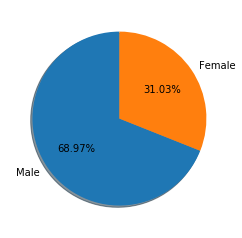

In [254]:
male = len(dataset[dataset['Gender'] == 'Male'])
female = len(dataset[dataset['Gender'] == 'Female'])
plt.pie(x=[male, female], explode=(0, 0), labels=['Male', 'Female'], autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()

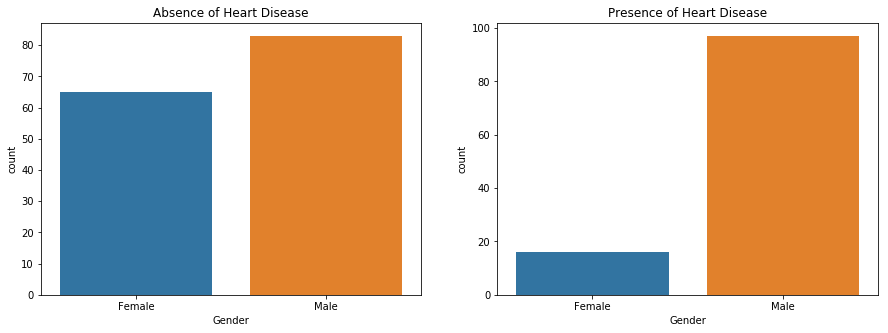

In [255]:
absence = dataset[dataset["Goal"]=='Absence']["Gender"].sort_values()
presence = dataset[dataset["Goal"]=='Presence']["Gender"].sort_values()
f, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(absence, data=dataset,ax=axes[0]).set_title('Absence of Heart Disease')
sns.countplot(presence, data=dataset,ax=axes[1]).set_title('Presence of Heart Disease')
plt.show()
f.savefig('gender.png')

In [256]:
# Chi-square test of independence of variables
cont = pd.crosstab(dataset['Gender'],dataset['Goal'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi statistics is {chi_stat[0]} and  p value is {chi_stat[1]}')
#Null hypothesis : Gender is not associated with Goal
#Alternate hypothesis : Gender is associated with Goal 

Chi statistics is 25.141967382205216 and  p value is 5.326104070129059e-07


### Observation
As expected, given the low p-value(1.926225633356082e-06), so we reject null hypothesis and the test result detect a significant relationship between Gender and Goal.<br>

## 4.2.2 Chest Pain Type

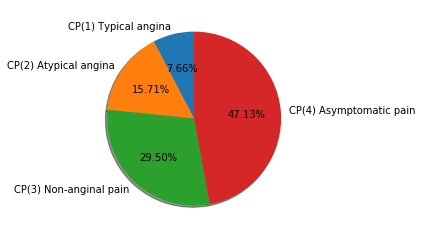

In [257]:
x = [len(dataset[dataset['CP'] == 'Typical angina']),len(dataset[dataset['CP'] == 'Atypical angina']), len(dataset[dataset['CP'] == 'Non-anginal pain']), len(dataset[dataset['CP'] == 'Asymptomatic pain'])]
plt.pie(x, data=dataset, labels=['CP(1) Typical angina', 'CP(2) Atypical angina', 'CP(3) Non-anginal pain', 'CP(4) Asymptomatic pain'], autopct='%1.2f%%', shadow=True,startangle=90)
plt.show()


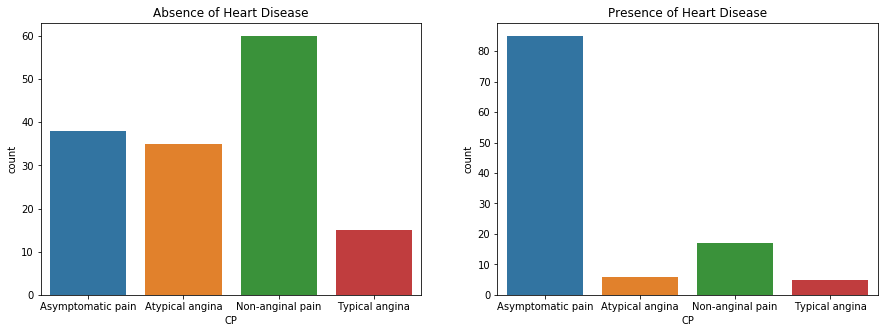

In [258]:
f, axes = plt.subplots(1,2,figsize=(15,5))
absence = dataset[dataset["Goal"]=='Absence']["CP"]
presence = dataset[dataset["Goal"]=='Presence']["CP"]
sns.countplot(absence, data=dataset,ax=axes[0]).set_title('Absence of Heart Disease')
sns.countplot(presence, data=dataset,ax=axes[1]).set_title('Presence of Heart Disease')
plt.show()
f.savefig('cp.png')

In [259]:
# Chi-square test of independence of variables
cont = pd.crosstab(dataset['CP'],dataset['Goal'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi statistics is {chi_stat[0]} and  p value is {chi_stat[1]}')
#Null hypothesis : Chest Pain is not associated with Goal
#Alternate hypothesis : Chest Pain is associated with Goal 

Chi statistics is 63.94087517747943 and  p value is 8.450535705798324e-14


### Observation
As expected, given the low p-value, so we reject null hypothesis and the test result detect a significant relationship between CP and Goal.<br> Presence of disease graph have 90 patients with Chest pain type 4 much higher as compared to other chest pain.So, Asymptomatic pain can high predictive power.

## 4.2.3 Fasting Blood Sugar

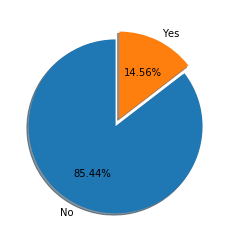

In [260]:
sizes = [len(dataset[dataset['FBS'] == 'No']), len(dataset[dataset['FBS'] == 'Yes'])]
labels = ['No', 'Yes']
plt.pie(x=sizes, labels=labels, explode=(0.1, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()
# Fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

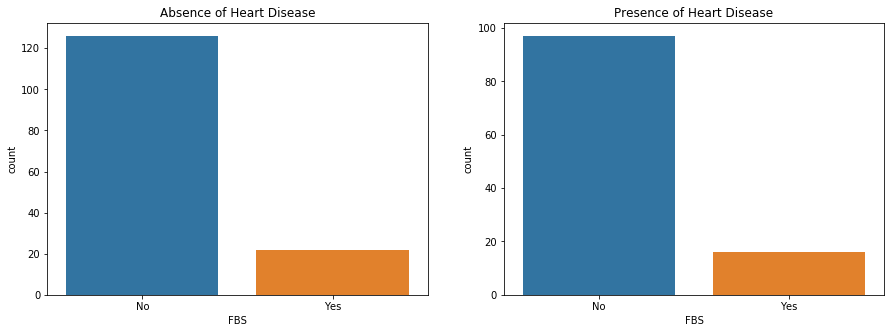

In [261]:
f, axes = plt.subplots(1,2,figsize=(15,5))
absence = dataset[dataset["Goal"]=='Absence']["FBS"]
presence = dataset[dataset["Goal"]=='Presence']["FBS"]
sns.countplot(absence, data=dataset,ax=axes[0]).set_title('Absence of Heart Disease')
sns.countplot(presence, data=dataset,ax=axes[1]).set_title('Presence of Heart Disease')
plt.show()
f.savefig('fbs.png')

In [262]:
# Chi-square test of independence of variables
cont = pd.crosstab(dataset['FBS'],dataset['Goal'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi statistics is {chi_stat[0]} and  p value is {chi_stat[1]}')
#Null hypothesis : FBS is not associated with Goal
#Alternate hypothesis : FBS is associated with Goal 

Chi statistics is 0.00028776098726399107 and  p value is 0.986465718957874


### Observation
As expected, given the high p-value, so we fail to reject null hypothesis and the test result detect a non-significant relationship between Fbs and Goal.<br>
Most individuals did not have fasting blood sugar levels greater than 120 mg/dL. This did not change greatly when the data was divided based on the presence of disease.So, FBS is not a predictive feature.

## 4.2.4 Resting ECG Results

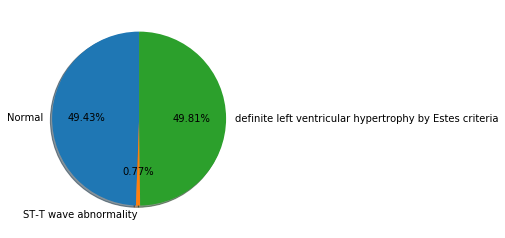

In [263]:
sizes = [len(dataset[dataset['RestECG'] =='Normal']), len(dataset[dataset['RestECG']=='Abnormality']), len(dataset[dataset['RestECG']=='Hypertrophy'])]
labels = ['Normal', 'ST-T wave abnormality', 'definite left ventricular hypertrophy by Estes criteria']
plt.pie(x=sizes, labels=labels, explode=(0, 0, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

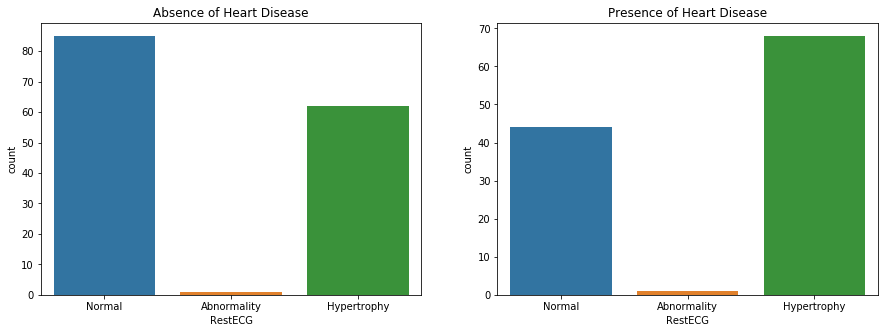

In [264]:
f, axes = plt.subplots(1,2,figsize=(15,5))
absence = dataset[dataset["Goal"]=='Absence']["RestECG"]
presence = dataset[dataset["Goal"]=='Presence']["RestECG"]
sns.countplot(absence, data=dataset,ax=axes[0],order=['Normal', 'Abnormality', 'Hypertrophy']).set_title('Absence of Heart Disease')
sns.countplot(presence,ax=axes[1],order=['Normal', 'Abnormality', 'Hypertrophy']).set_title('Presence of Heart Disease')
plt.show()
f.savefig('restecg.png')

In [265]:
print(f'Probability of Hypertropy in disease cohorts {presence[presence=="Hypertrophy"].value_counts()/len(presence)}')
print(f'Probability of Hypertropy in non-disease cohorts {absence[absence=="Hypertrophy"].value_counts()/len(absence)}')


Probability of Hypertropy in disease cohorts Hypertrophy    0.60177
Name: RestECG, dtype: float64
Probability of Hypertropy in non-disease cohorts Hypertrophy    0.418919
Name: RestECG, dtype: float64


In [379]:
cont = pd.crosstab(dataset['RestECG'],dataset['Goal'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi statistics is {chi_stat[0]} and  p value is {chi_stat[1]}')
#Null hypothesis : Exang is not associated with Goal
#Alternate hypothesis : Exang is associated with Goal 

Chi statistics is 8.77219199941468 and  p value is 0.012449236295157253


### Observation

Most patients exhibited normal resting electrocardiograhic results . However, a higher proportion of diseased patients had hypertropy suggesting that this feature may contribute some predictive power.

## 4.2.5 Exercise Induced Angina

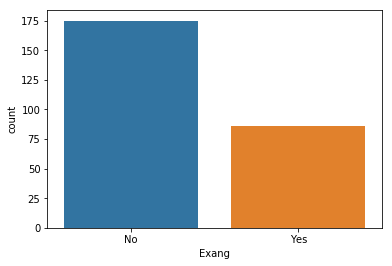

In [266]:
sns.countplot(data =dataset , x = 'Exang')
# exercise induced angina (1 = yes; 0 = no)

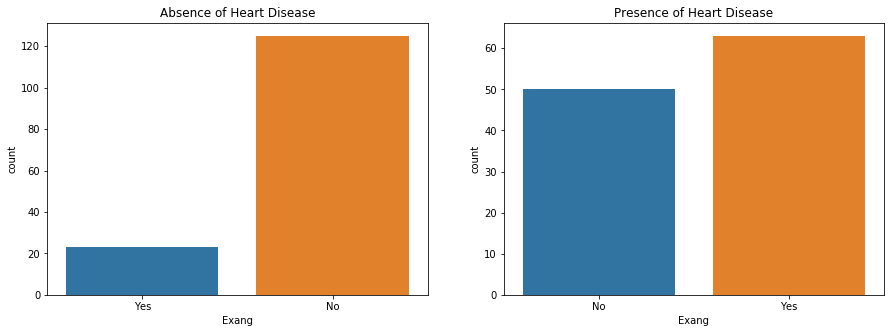

In [267]:
f, axes = plt.subplots(1,2,figsize=(15,5))
absence = dataset[dataset["Goal"]=='Absence']["Exang"]
presence = dataset[dataset["Goal"]=='Presence']["Exang"]
sns.countplot(absence, data=dataset,ax=axes[0]).set_title('Absence of Heart Disease')
sns.countplot(presence, data=dataset,ax=axes[1]).set_title('Presence of Heart Disease')
plt.show()
f.savefig('exang.png')

In [268]:
# Chi-square test of independence of variables
cont = pd.crosstab(dataset['Exang'],dataset['Goal'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi statistics is {chi_stat[0]} and  p value is {chi_stat[1]}')
#Null hypothesis : Exang is not associated with Goal
#Alternate hypothesis : Exang is associated with Goal 

Chi statistics is 45.094917186870525 and  p value is 1.8771197577079585e-11


### Observation
As expected, given the low p-value, so we reject null hypothesis and the test result detect a significant relationship between Exang and Goal.<br>
Significantly more patients in the diseased cohort displayed exercise induced angina. This feature should be strongly predictive.

## 4.2.6 Peak Exercise ST Segment

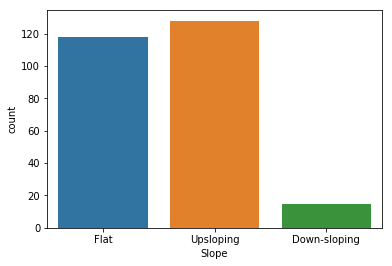

In [269]:
sns.countplot(data =dataset , x = 'Slope')
# Slope: the slope of the peak exercise ST segment
    # Value 1: upsloping
    # Value 2: flat
    # Value 3: down-sloping

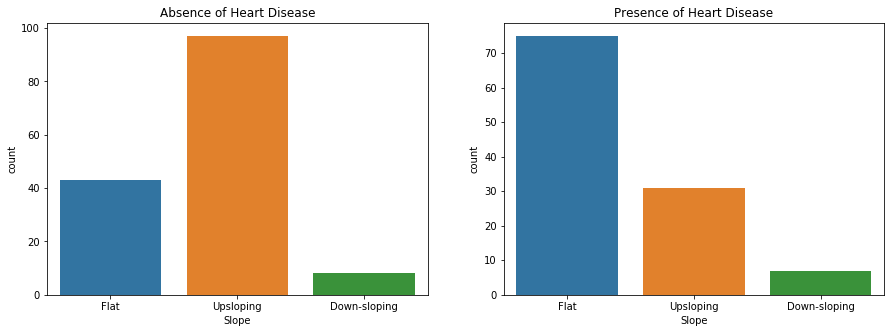

In [270]:
f, axes = plt.subplots(1,2,figsize=(15,5))
absence = dataset[dataset["Goal"]=='Absence']["Slope"]
presence = dataset[dataset["Goal"]=='Presence']["Slope"]
sns.countplot(absence, data=dataset,ax=axes[0]).set_title('Absence of Heart Disease')
sns.countplot(presence, data=dataset,ax=axes[1]).set_title('Presence of Heart Disease')
plt.show()
f.savefig('slope.png')

In [271]:
# Chi-square test of independence of variables
cont = pd.crosstab(dataset['Slope'],dataset['Goal'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi statistics is {chi_stat[0]} and  p value is {chi_stat[1]}')
#Null hypothesis : Slope is not associated with Goal
#Alternate hypothesis : Slope is associated with Goal 

Chi statistics is 38.7797612721771 and  p value is 3.793864667948786e-09


### Observation
As expected, given the low p-value, so we reject null hypothesis and the test result detect a significant relationship between Slope and Goal.<br>
Significantly more patients in the non-diseased cohort displayed Slope-Flat. This feature could be strongly predictive.<br>
The slope of the peak exercise ST segment differed between the non-disease and diseased cohorts with the majority of cardiac disease patients exhibiting a flat ST slope(value = 2).This can also have good predictive power.

## 4.2.7 Number of Blood Vessels

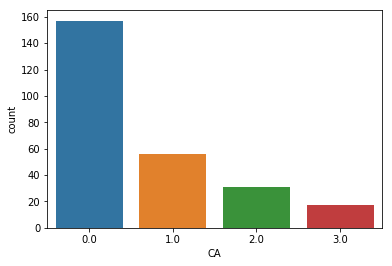

In [272]:
sns.countplot(data =dataset , x = 'CA')

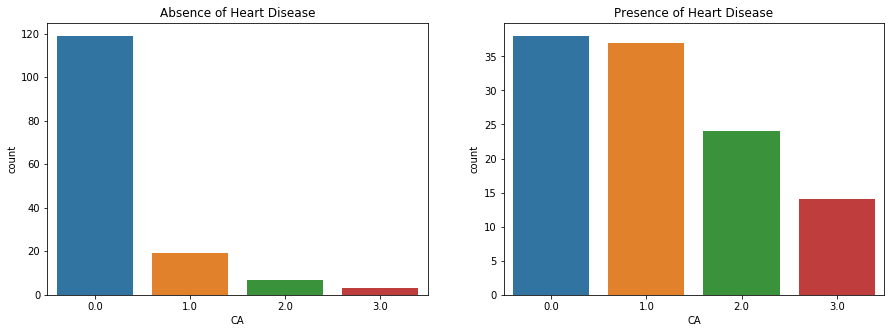

In [273]:
f, axes = plt.subplots(1,2,figsize=(15,5))
absence = dataset[dataset["Goal"]=='Absence']["CA"]
presence = dataset[dataset["Goal"]=='Presence']["CA"]
sns.countplot(absence, data=dataset,ax=axes[0]).set_title('Absence of Heart Disease')
sns.countplot(presence, data=dataset,ax=axes[1]).set_title('Presence of Heart Disease')
plt.show()
f.savefig('ca.png')

In [274]:
# Chi-square test of independence of variables
cont = pd.crosstab(dataset['CA'],dataset['Goal'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi statistics is {chi_stat[0]} and  p value is {chi_stat[1]}')
#Null hypothesis : CA is not associated with Goal
#Alternate hypothesis : CA is associated with Goal 

Chi statistics is 60.40857401830753 and  p value is 4.807872016239094e-13


### Observation
As expected, given the low p-value, so we reject null hypothesis and the test result detect a significant relationship between CA and Goal.
Significantly more patients in the diseased cohort has number of blood vessels greater than 1. This feature should be strongly predictive.

## 4.2.8 Thalassemia

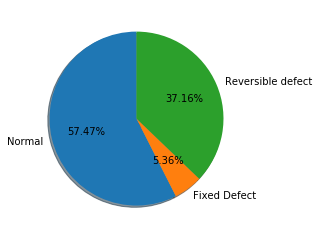

In [275]:
sizes = [len(dataset[dataset['Thal'] =='Normal']), len(dataset[dataset['Thal']=='Fixed Defect']), len(dataset[dataset['Thal']=='Reversible defect'])]
labels = ['Normal', 'Fixed Defect', 'Reversible defect']
plt.pie(x=sizes, labels=labels, explode=(0, 0, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

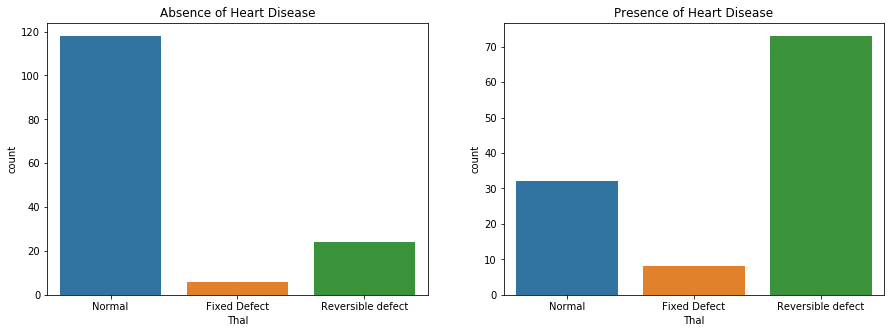

In [276]:
f, axes = plt.subplots(1,2,figsize=(15,5))
absence = dataset[dataset["Goal"]=='Absence']["Thal"]
presence = dataset[dataset["Goal"]=='Presence']["Thal"]
sns.countplot(absence, data=dataset,ax=axes[0],order=['Normal', 'Fixed Defect', 'Reversible defect']).set_title('Absence of Heart Disease')
sns.countplot(presence, data=dataset,ax=axes[1],order=['Normal', 'Fixed Defect', 'Reversible defect']).set_title('Presence of Heart Disease')
plt.show()
f.savefig('thal.png')

In [277]:
# Chi-square test of independence of variables
cont = pd.crosstab(dataset['Thal'],dataset['Goal'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi statistics is {chi_stat[0]} and  p value is {chi_stat[1]}')
#Null hypothesis : CA is not associated with Goal
#Alternate hypothesis : CA is associated with Goal 

Chi statistics is 70.92692989782304 and  p value is 3.9665493643250104e-16


### Observation
As expected, given the low p-value, so we reject null hypothesis and the test result detect a significant relationship between Thal and Goal. Significantly more patients in the diseased cohort has Reversible defect. This feature should be strongly predictive.

# 5. Multivariate Visualisation

## 5.1. Gender, Chest Pain Type and Resting ECG

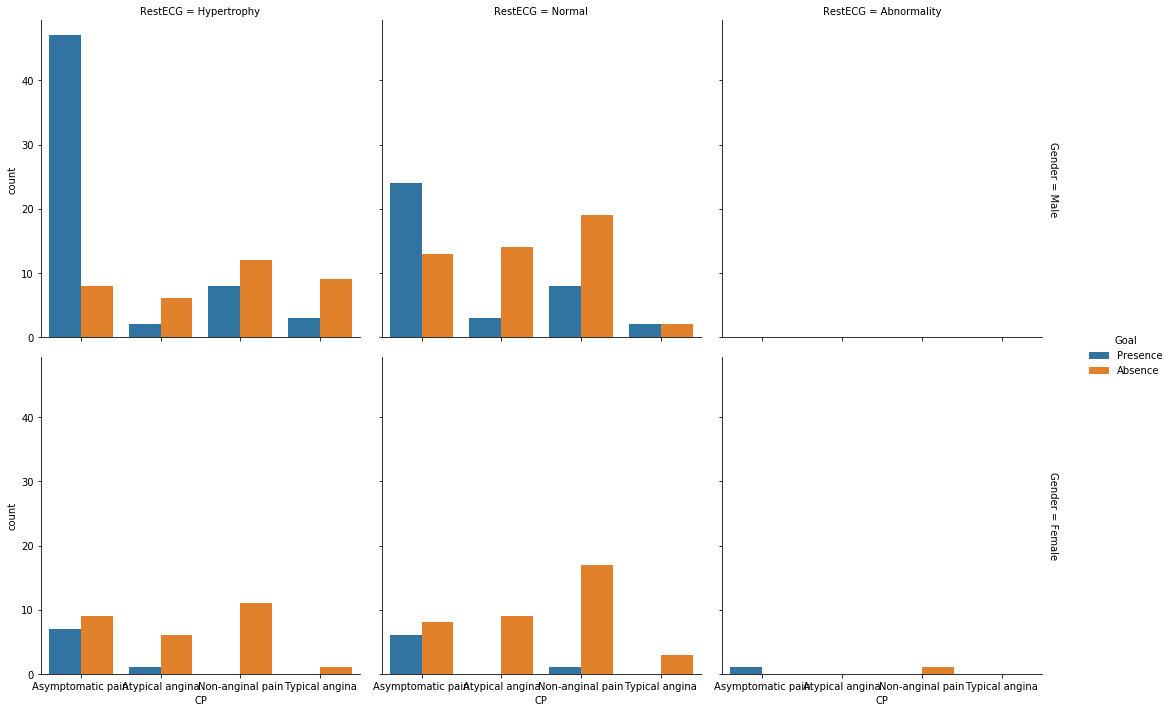

In [278]:
sns.catplot(x="CP",hue="Goal", row="Gender",col="RestECG",data=dataset,kind="count",margin_titles=True)

### Observation

The following visual shows that most individuals diagnosed with cardiac disease were males with typical signs of asymptomatic angina pain(value = 4) and showing probable or definite left ventricular hypertropy(restECG =2) .


## 5.2. Gender, Chest Pain Type and Exercise Induced Angina

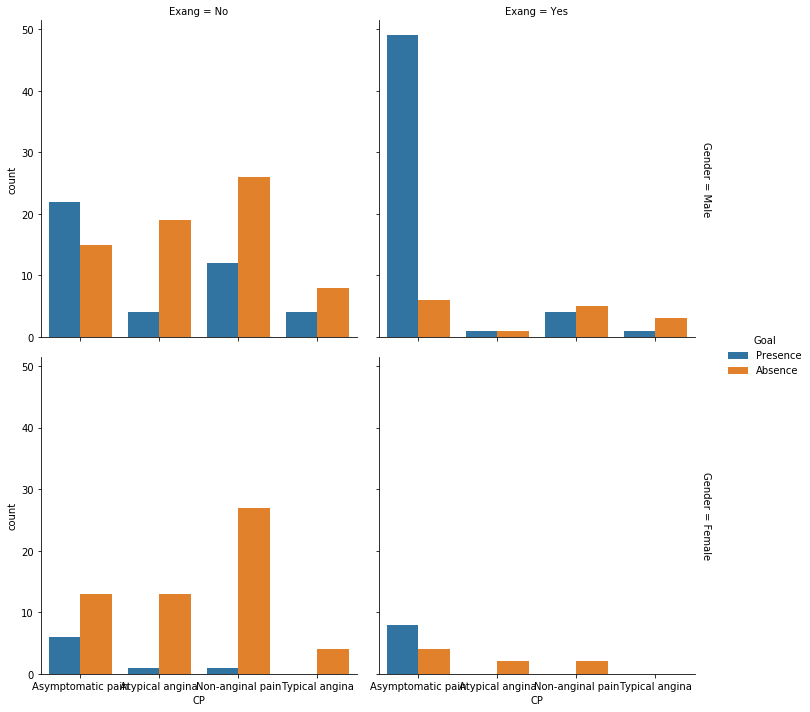

In [279]:
sns.catplot(x="CP",hue="Goal", row="Gender",col="Exang",data=dataset, kind="count",margin_titles=True);
# Exang: exercise induced angina (1 = yes; 0 = no)

### Observation

The following visual shows that most individuals diagnosed with cardiac disease were males with typical signs of asymptomatic angina pain(value = 4) and having exercise induced angina(exang=1) .

## 6. Summary
Exploration of the data indicated that Oldpeak, Thalach, CP(Asymptomatic pain), CA(>1), Thalassemia(Reversible defect) are possible useful features for predicting the presence of cardiac disease. Age, Exang, Slope,Trestbps, Chol, Gender, FBS and RestECG  were also found to have a potentially minor predictive power.<br>

Strong Predictive power attributes:- Oldpeak, Thalach, CP(Asymptomatic pain), CA(>1), Thalassemia(Reversible defect)<br>

 * Patient having higher(greater than 1) oldpeak value have more probability of having heart disease than patient with lower oldpeak value(leass than 1).
 * Patient those have cardiac disease have lower heart rate(less than 140) as compare to patient not having cardiac disease(greater than 140).
 * Patient suffering from heart disease have more probability of having asymptomatic chest pain than patient not having heart disease.
 * Disease cohort have more chance(six times) of having reversible defect of thalassemia than non disease cohort.

Moderate Predictive power attributes:- Age, Exang, Slope<br>
 * Patient who are older have more chances of having heart disease.
 * Disease cohort have more chances of having chest pain after exercise than non-disease cohort.
 * Disease cohort have more chances of having flat st wave slope than non-disease cohort.

Weak Predictive power attributes:- Trestbps, Chol, Gender, FBS, RestECG<br>
* These attributes didn't show any predictive power or can't distinguish between disease and non-disease cohort on the basis of these attributes.


***
<br>


# Applying Models

### Creating Dummy Variables 
Before applying any model, creating dummy variables of categorical attributes.Dummy variables are useful because they enable to use a single regression equation to represent multiple groups and also a single dummy variable contains a lot of information . Dummy variable converts categorical variable into k-1 new attributes(k is the levels of categorical attribute).

In [280]:
dataset['Goal']=dataset['Goal'].replace( ['Absence', 'Presence'],[0,1])
dataset['Goal']=dataset['Goal'].astype('int64')
dataset = pd.get_dummies(dataset,drop_first=False)

### Scaling the numerical variables 
Feature scaling is a method used to standardize the range of independent variables or features of data.Min-max scaling is the simplest method and consists in rescaling the range of features to scale the range in [0,1].  

In [281]:
dataset = (dataset - np.min(dataset)) / (np.max(dataset) - np.min(dataset)).values

## Splitting Dataset into Train and Test set
To implement this algorithm model, we need to separate dependent and independent variables within our data sets and divide the dataset in training set and testing set for evaluating models.

In [282]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Goal', 1), dataset['Goal'], test_size = .2, random_state=42,shuffle=True)

# Logistic Regression

* Logistic Regression is generally used for classification purposes.When the number of possible outcomes is only two it is called Binary Logistic Regression.<br>In logistic regression we don't output the weighted sum of inputs directly, but we pass it through a function that can map any real value between 0 and 1.<br>The activation function  is  sigmoid function.1 / (1 + e^-value)The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. 
<br>
* The coefficients (Beta values b) of the logistic regression algorithm must be estimated from your training data.<br>

### Training Model

### Hyperparameter Tuning using GridSearchCV
Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid

In [283]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(class_weight='balanced',random_state=42)
param_grid = { 
    'C': [0.1,0.2,0.3,0.4],
    'penalty': ['l1', 'l2'],
    'class_weight':[{0: 1, 1: 1},{ 0:0.67, 1:0.33 },{ 0:0.75, 1:0.25 },{ 0:0.8, 1:0.2 }]}
CV_rfc = GridSearchCV(estimator=lr, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'C': 0.3, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2'}

##### C: Inverse of regularization strength; must be a positive float.
* Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Regularization is a technique to discourage the complexity of the model. It does this by penalizing the loss function.<br>L(x,y)=(y(i)-f(x))^2 <br>
  This helps to solve the overfitting problem.
* Loss function is the sum of squared difference between the actual value and the predicted value.
* As the degree of the input features increases the model becomes complex and tries to fit all the data points.
* So by penalizing the smaller weights and make them too small, very close to zero. It makes those terms negligible and helps simplify the model.
* Regularization works on assumption that smaller weights generate simpler model and thus helps avoid overfitting.

##### L1 Regularization or Lasso
* In L1 norm we shrink the parameters to zero. When input features have weights closer to zero. majority of the input features have zero weights and very few features have non zero weights.L1 regularization does feature selection. It does this by assigning insignificant input features with zero weight and useful features with a non zero weight.<br>L(x,y)=(y(i)-f(x))^2 +lambda* sum of  parameters.

##### L2 Regularization or Ridge Regularization
* L2 regularization forces the weights to be small but does not make them zero.<br>L(x,y)=(y(i)-f(x))^2 +lambda* sum of squares of parameters.

##### Class weight
class weights will be given by n_samples / (n_classes * np.bincount(y))

So,C=0.3 and l1 regularization are best hyperparameters for my model. All the models will have these hyperparameters value.

#### Training the model with all attributes

In [284]:
#fitting the model
lr1=LogisticRegression(C=0.2,random_state=42,penalty='l1',class_weight={0:1,1:1})
lr1.fit(X_train,y_train)

LogisticRegression(C=0.2, class_weight={0: 1, 1: 1}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=42,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [285]:
y_pred1=lr1.predict(X_test)
print("Logistic Train score with ",format(lr1.score(X_train, y_train)))
print("Logistic Test score with ",format(lr1.score(X_test, y_test)))

Logistic Train score with  0.8605769230769231
Logistic Test score with  0.8113207547169812


### Confusion Matrix

Text(0.5, 257.44, 'Predicted label')

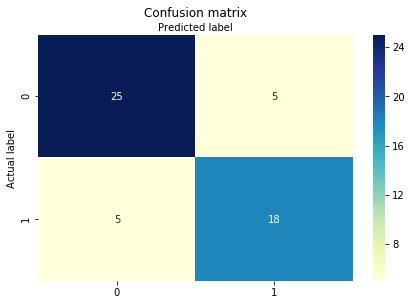

In [286]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm2 = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm2, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [287]:
sensitivity2 = cm2[1,1]/(cm2[1,1]+cm2[1,0])
print('Sensitivity/Recall : ', sensitivity2)

specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Specificity : ', specificity2)

precision2 = cm2[1,1]/(cm2[1,1]+cm2[0,1])
print('Precision   : ', precision2)

F1score2=(2*sensitivity2*precision2)/(sensitivity2+precision2)
print('F1 score    : ', F1score2)

Sensitivity/Recall :  0.782608695652174
Specificity :  0.8333333333333334
Precision   :  0.782608695652174
F1 score    :  0.782608695652174


In a medical test the big indicators of success are specificity and sensitivity.
* Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.
* Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative
* Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.
* F1 score -  a good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms.

#### Training model with the most predictive power attributes concluded in Eda part

In [288]:
test_attributes=X_test[['Oldpeak','Thalach','CA','Thal_Reversible defect','CP_Asymptomatic pain']]
train_attributes=X_train[['Oldpeak','Thalach','CA','Thal_Reversible defect','CP_Asymptomatic pain']]
lr2=LogisticRegression(C=0.3,penalty='l2',class_weight={0:1,1:1})
lr2.fit(train_attributes,y_train)

LogisticRegression(C=0.3, class_weight={0: 1, 1: 1}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [289]:
y_pred2=lr2.predict(test_attributes)
print("Logistic Train score with ",format(lr2.score(train_attributes, y_train)))
print("Logistic Test score with ",format(accuracy_score(y_pred1, y_test)))

Logistic Train score with  0.8413461538461539
Logistic Test score with  0.8113207547169812


As concluded in eda part, these 'Oldpeak','Thalach','CA','Thal_Reversible defect','CP_Asymptomatic pain' four columns were showing strong predictive power.By training the model on these 4 columns, training accuracy is 84% and testing accuracy is 83%.

#### Confusion Matrix

Text(0.5, 257.44, 'Predicted label')

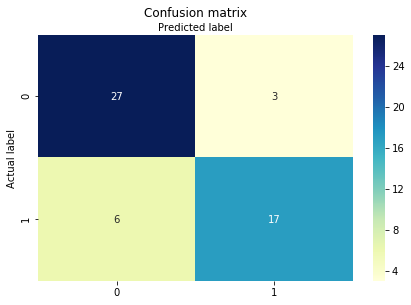

In [290]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [291]:
sensitivity2 = cm2[1,1]/(cm2[1,1]+cm2[1,0])
print('Sensitivity/Recall : ', sensitivity2)

specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Specificity : ', specificity2)

precision2 = cm2[1,1]/(cm2[1,1]+cm2[0,1])
print('Precision   : ', precision2)

F1score2=(2*sensitivity2*precision2)/(sensitivity2+precision2)
print('F1 score    : ', F1score2)

Sensitivity/Recall :  0.7391304347826086
Specificity :  0.9
Precision   :  0.85
F1 score    :  0.7906976744186046


In a medical test the big indicators of success are specificity and sensitivity.
* Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.
* Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative
* Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.
* F1 score -  a good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms.

### K-FOLD Cross Validation 
Cross Validation is a very useful technique for assessing the performance of machine learning models. It helps in knowing how the machine learning model would generalize to an independent data set.K-Fold CV is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point.

In [292]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf.get_n_splits(X_train, y_train)
results = cross_val_score(lr1, X_train, y_train, cv=skf, n_jobs=1, scoring='accuracy')
results.mean()

0.8308943089430894

It also check for overfitting and to get an idea about how your machine learning model will generalize.84% mean accuracy of all the folds proves there is no overfitting.

#### Feature Importance
Feature importances for any black-box estimator by measuring how score decreases when a feature is not available; the method is also known as “permutation importance”.

In [293]:
perm_imp1 = PermutationImportance(lr1, random_state=42,scoring='accuracy').fit(X_test, y_test)
eli5.show_weights(perm_imp1, feature_names = X_test.columns.tolist(),top=50)

After seeing the feature importance chart, i will remove the columns which have less weight or importance. The main motive of applying a model  is getting a good accuracy with less features.

So, CA is the most important feature i.e. number of major vessels which makes sense as what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries", it seems logical the more major vessels is a good thing, and therefore will reduce the probability of heart disease

In [294]:
X_train2=X_train.drop(['Exang_No'],axis=1)
X_test2=X_test.drop(['Exang_No'],axis=1)

## Applying Model after removing least significant attribute 
A general rule in machine learning is that the more features you have, the more likely your model will suffer from overfitting

In [295]:
lr2=LogisticRegression(C=0.2,penalty='l1',class_weight={0:1,1:1})
lr2.fit(X_train2,y_train)
y_pred2=lr2.predict(X_test2)

In [296]:
print("Logistic TRAIN score with ",format(lr2.score(X_train2, y_train)))
print("Logistic TEST score with ",format(lr2.score(X_test2, y_test)))

Logistic TRAIN score with  0.8557692307692307
Logistic TEST score with  0.8113207547169812


#### Feature Importance
Feature importances for any black-box estimator by measuring how score decreases when a feature is not available; the method is also known as “permutation importance”.

In [297]:
perm_imp1 = PermutationImportance(lr2, random_state=42,scoring='accuracy').fit(X_test2, y_test)
eli5.show_weights(perm_imp1, feature_names = X_test2.columns.tolist(),top=50)

In [298]:
X_train3=X_train2.drop(['Age','Thal_Fixed Defect','Slope_Flat','Slope_Down-sloping','RestECG_Hypertrophy','RestECG_Abnormality','FBS_Yes','Oldpeak'],axis=1)
X_test3=X_test2.drop(['Age','Thal_Fixed Defect','Slope_Flat','Slope_Down-sloping','RestECG_Hypertrophy','RestECG_Abnormality','FBS_Yes','Oldpeak'],axis=1)

### Applying Model after removing least significant attribute
A general rule in machine learning is that the more features you have, the more likely your model will suffer from overfitting

In [299]:
lr3=LogisticRegression(C=0.3,penalty='l2',class_weight={0:1,1:1})
lr3.fit(X_train3,y_train)
y_pred3=lr3.predict(X_test3)
y_probab3=lr3.predict_proba(X_test3)

In [300]:
print("Logistic TRAIN score with ",format(lr2.score(X_train2, y_train)))
print("Logistic TEST score with ",format(lr2.score(X_test2, y_test)))

Logistic TRAIN score with  0.8557692307692307
Logistic TEST score with  0.8113207547169812


So, even after removing the less significant columns accuracy is not changing.The best accuracy acheived is 83% test and 85% train accuracy.

### Confusion Matrix  

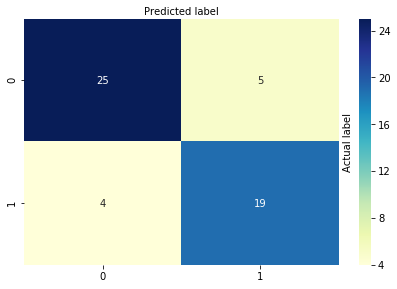

In [301]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm2 = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm2, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.yaxis.set_label_position("right")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("cmlr.png")

In [302]:
sensitivity2 = cm2[1,1]/(cm2[1,1]+cm2[1,0])
print('Sensitivity/Recall : ', sensitivity2)

specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Specificity : ', specificity2)

precision2 = cm2[1,1]/(cm2[1,1]+cm2[0,1])
print('Precision   : ', precision2)

F1score2=(2*sensitivity2*precision2)/(sensitivity2+precision2)
print('F1 score    : ', F1score2)

Sensitivity/Recall :  0.8260869565217391
Specificity :  0.8333333333333334
Precision   :  0.7916666666666666
F1 score    :  0.8085106382978724


In a medical test the big indicators of success are specificity and sensitivity.
* Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.
* Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative
* Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.
* F1 score -  a good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms.

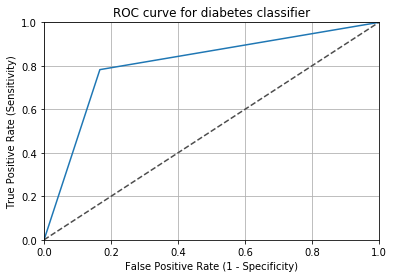

In [303]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred2)
fig, ax = plt.subplots()
ax.plot(fpr1, tpr1)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.savefig("roclr.png")

In [304]:
#Higher the AUC, better the model is at distinguishing between patients with disease and no disease.
roc_auc2 = auc(fpr1, tpr1)
roc_auc2

0.8079710144927535

AUC value is 0.82 that means our model is able to distinguishing between patients with disease and no disease with probability of 0.82. So it is a good value.

Our classifier should be sensitive to false negatives. For this dataset, false negative is a person that has heart disease but our classifier decided that the person does not have any heart problems. In other words, classifier said that the ill person is healthy. On the other side, false positive is a person that does not have any heart diseases and our classifier decided that person is ill. In that case, the person will run more tests and conclude it does not have any heart problems.So my model should have high sensitivity.<br>
The optimal cut off would be where tpr is high and fpr is low

## Reducing Type II Error

In [305]:
y_pred04=[]
for i in range(len(y_probab3)):
    y_pred04.append(1 if y_probab3[i,1]>0.3 else 0)


Text(0.5, 257.44, 'Predicted label')

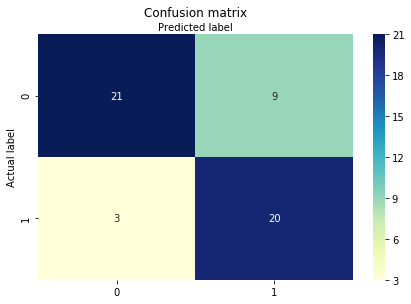

In [306]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm04 = confusion_matrix(y_test, y_pred04)
sns.heatmap(cm04, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [307]:
sensitivity04 = cm04[1,1]/(cm04[1,1]+cm04[1,0])
print('Sensitivity/Recall : ', sensitivity04)

specificity04 = cm04[0,0]/(cm04[0,0]+cm04[0,1])
print('Specificity : ', specificity04)

precision04 = cm04[1,1]/(cm04[1,1]+cm04[0,1])
print('Precision   : ', precision04)

F1score04=(2*sensitivity04*precision04)/(sensitivity04+precision04)
print('F1 score    : ', F1score04)

Sensitivity/Recall :  0.8695652173913043
Specificity :  0.7
Precision   :  0.6896551724137931
F1 score    :  0.7692307692307693


In a medical test the big indicators of success are specificity and sensitivity.
* Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.
* Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative
* Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.
* F1 score -  a good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms.

## Logistic Regression with PCA

In [308]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_train)
trainComponents = pca.fit_transform(X_train)
testComponents = pca.fit_transform(X_test)
lr=LogisticRegression(C=0.3,penalty='l2',class_weight={0:1,1:1})
lr.fit(trainComponents,y_train)
y_pred5=lr.predict(testComponents)
print("Logistic TRAIN score with ",format(lr.score(trainComponents, y_train)))
print("Logistic TEST score with ",format(lr.score(testComponents, y_test)))

Logistic TRAIN score with  0.8461538461538461
Logistic TEST score with  0.8113207547169812


In [309]:
pca.explained_variance_ratio_.cumsum()

array([0.31562676, 0.44977753, 0.5615613 , 0.65945039, 0.73619225,
       0.79593699, 0.84747981, 0.8848643 , 0.91451201, 0.9378075 ])

Text(0.5, 257.44, 'Predicted label')

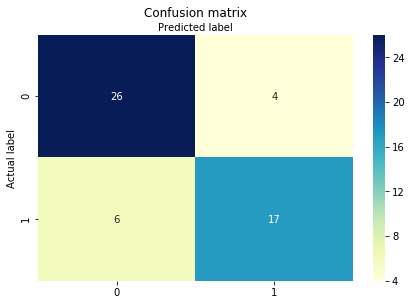

In [310]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm04 = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm04, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [311]:
sensitivity2 = cm2[1,1]/(cm2[1,1]+cm2[1,0])
print('Sensitivity/Recall : ', sensitivity2)

specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Specificity : ', specificity2)

precision2 = cm2[1,1]/(cm2[1,1]+cm2[0,1])
print('Precision   : ', precision2)

F1score2=(2*sensitivity2*precision2)/(sensitivity2+precision2)
print('F1 score    : ', F1score2)

Sensitivity/Recall :  0.8260869565217391
Specificity :  0.8333333333333334
Precision   :  0.7916666666666666
F1 score    :  0.8085106382978724


In a medical test the big indicators of success are specificity and sensitivity.
* Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.
* Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative
* Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.
* F1 score -  a good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms.

## Comparing all logistic models

| Models | Accuracy | Senstivity | Specificity | Precision | F1score 
| --- | --- | --- | --- | --- | --- | 
| Logistic(all variables) | 83% | .76 |.85 | .83|.8
| Logistic(5 variables) | 81% | .73 |.9 | .85|.79
| Logistic(rem less sign) | 83% | .76 |.85 | .83|.81
| Logistic(PCA) | 77% | .76 |.85 | .83|.8

## Random Forest
A random forest is simply a collection of decision trees whose results are aggregated into one final result. Their ability to limit overfitting without substantially increasing error due to bias is why they are such powerful models. <br>
Random forests consist of multiple single trees each based on a random sample of the training data. They are typically more accurate than single decision trees. The following figure shows the decision boundary becomes more accurate and stable as more trees are added

### Hyperparameter Tuning using GridSearch

In [312]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(oob_score=True,random_state=42)
param_grid = { 
    'n_estimators': [200,300,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 500}

 1. Entropy
 A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). ID3 algorithm uses entropy to calculate the homogeneity of a sample. If the sample is completely homogeneous the entropy is zero and if the sample is an equally divided it has entropy of one.
 
 2. Gini Index
 Gini index says, if we select two items from a population at random then they must be of same class and probability for this is 1 if population is pure.Higher the value of Gini higher the homogeneity.It performs only Binary splits
 <br>
 * n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data
 * max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. We fit each decision tree with depths ranging from 1 to 32 and plot the training and test errors.
 * max_features represents the number of features to consider when looking for the best split.

In [313]:
model = RandomForestClassifier(max_depth=6,oob_score=True,random_state=42,criterion='entropy',max_features='auto',n_estimators=300)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [314]:
estimator = model.estimators_[3]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'Absence'
y_train_str[y_train_str == '1'] = 'Presence'
y_train_str = y_train_str.values

In [315]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\u22v03\\Documents\\Python Scripts\\heart\\release\\bin'
!dot -Tpng tree.dot -o tree.png -Gdpi=600

from IPython.display import Image
Image(filename = 'tree.png')

In [316]:
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [317]:
print("Random forest TRAIN score with ",format(model.score(X_train, y_train)))
print("Random forest TEST score with ",format(model.score(X_test, y_test)))

Random forest TRAIN score with  0.9759615384615384
Random forest TEST score with  0.8490566037735849


### Feature Importance
Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature

In [318]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

importance
Oldpeak                   0.098139
Thalach                   0.097790
Thal_Normal               0.094200
Chol                      0.088139
CA                        0.079265
Age                       0.076945
CP_Asymptomatic pain      0.073111
Thal_Reversible defect    0.069048
Trestbps                  0.063535
Exang_Yes                 0.033872
Slope_Upsloping           0.033537
Exang_No                  0.030693
Slope_Flat                0.029424
RestECG_Hypertrophy       0.019796
RestECG_Normal            0.018999
CP_Non-anginal pain       0.018905
Gender_Female             0.018787
Gender_Male               0.015795
CP_Atypical angina        0.009873
CP_Typical angina         0.009355
FBS_No                    0.006852
FBS_Yes                   0.004949
Thal_Fixed Defect         0.004663
Slope_Down-sloping        0.003824
RestECG_Abnormality       0.000503

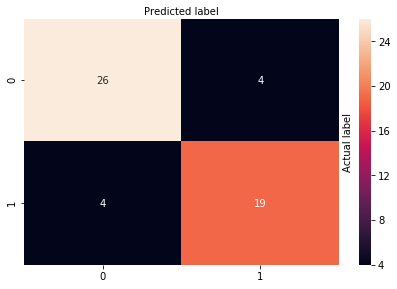

In [319]:
cm4 = confusion_matrix(y_test, y_pred_bin)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(cm4,annot=True)
ax.xaxis.set_label_position("top")
ax.yaxis.set_label_position("right")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("cmrf.png")

In [320]:
sensitivity4 = cm4[1,1]/(cm4[1,1]+cm4[1,0])#how good a test is at detecting the positives
print('Sensitivity/Recall : ', sensitivity4)

specificity4 = cm4[0,0]/(cm4[0,0]+cm4[0,1])#how good a test is at avoiding false alarms
print('Specificity : ', specificity4)

precision4 = cm4[1,1]/(cm4[1,1]+cm4[0,1])#how many of the positively classified were relevant
print('Precision   : ', precision4)

F1score4=(2*sensitivity4*precision4)/(sensitivity4+precision4)# low false positives and low false negatives
print('F1 score    : ', F1score4)

Sensitivity/Recall :  0.8260869565217391
Specificity :  0.8666666666666667
Precision   :  0.8260869565217391
F1 score    :  0.8260869565217391


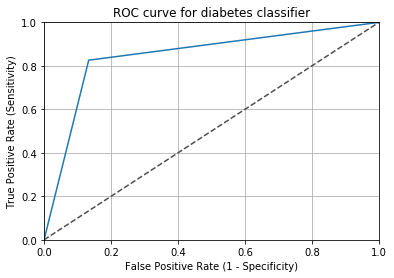

In [321]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_bin)
fig, ax = plt.subplots()
ax.plot(fpr1, tpr1)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.savefig("rocrf.png")

| Models | Accuracy | Senstivity | Specificity | Precision | F1score 
| --- | --- | --- | --- | --- | --- | 
| Random Forest(all variables) | 81% | .76 |.85 | .83|.8

## Applying Model after removing less significant attributes
A general rule in machine learning is that the more features you have, the more likely your model will suffer from overfitting

In [322]:
X_train5=X_train.drop(['RestECG_Abnormality'],axis=1)
X_test5=X_test.drop(['RestECG_Abnormality'],axis=1)

In [323]:
model = RandomForestClassifier(max_depth=5,oob_score=True,random_state=42,criterion='gini',max_features='auto',n_estimators=300)
model.fit(X_train5, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [324]:
y_pred_quant = model.predict_proba(X_test5)[:, 1]
y_pred_bin = model.predict(X_test5)

In [325]:
print("Random forest TRAIN score with ",format(model.score(X_train5, y_train)))
print("Random forest TEST score with ",format(model.score(X_test5, y_test)))

Random forest TRAIN score with  0.9423076923076923
Random forest TEST score with  0.8679245283018868


So, removing less significant columns in random forest reduces accuracy, only training time decreases.

| Models | Accuracy | Senstivity | Specificity | Precision | F1score 
| --- | --- | --- | --- | --- | --- | 
| Logistic(all variables) | 83% | .76 |.85 | .83|.8
| Logistic(5 variables) | 81% | .73 |.9 | .85|.79
| Logistic(rem less sign) | 83% | .76 |.85 | .83|.81
| Logistic(PCA) | 77% | .76 |.85 | .83|.8
| Random Forest(all variables) | 81% | .76 |.85 | .83|.8

## Summary

In this study,aim was to predict if a person has a heart disease or not based on attributes blood pressure,heart beat, exang, fbs and others.

Logistic regression model with all the variables and logistic regression model after removing less significant attributes performed best with an accuracy 83% , sensitivity 76%, specificity 85%, precision 83% and f1score 81%.


Important features:-

Oldpeak, Thalach, CP(Asymptomatic pain), CA(>1), Thalassemia(Reversible defect)these features were showing high predictive power after eda.<br>
Oldpeak, CA, Exang_Yes, Thalach and Thal_Reversible defect are the important features for classification after applying models.<br>
So, the number of major blood vessels increases, the probability of heart disease decreases. That makes sense, as it means more blood can get to the heart.
As the heart rate  increases, the probability of heart disease also increases. That makes sense, as it means having high heart rate leads to having a heart disease.




In [326]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred_bin=model.predict(X_test)

In [327]:
param_grid = {"criterion": ['entropy', 'gini'],
              "min_samples_split": [5,10,15],
              "max_depth": [2,3,5],
              "min_samples_leaf": [5,10,15],
              "max_leaf_nodes": [5,10,15],
              }

CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 15}

In [328]:
print("Random forest TRAIN score with ",format(model.score(X_train, y_train)))
print("Random forest TEST score with ",format(model.score(X_test, y_test)))

Random forest TRAIN score with  1.0
Random forest TEST score with  0.7735849056603774


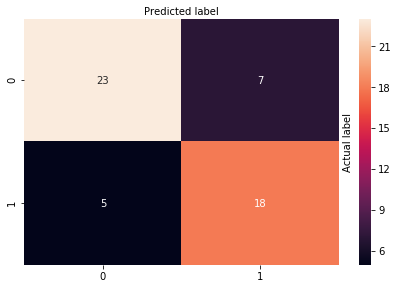

In [329]:

cm4 = confusion_matrix(y_test, y_pred_bin)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(cm4,annot=True)
ax.xaxis.set_label_position("top")
ax.yaxis.set_label_position("right")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("cmdt.png")

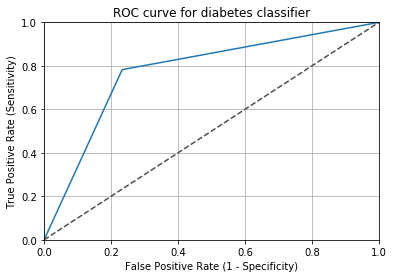

In [330]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_bin)
fig, ax = plt.subplots()
ax.plot(fpr1, tpr1)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.savefig("rocdt.png")